AI for Sustainability: Smart Crop Recommendation System This project addresses SDG 2 (Zero Hunger) and SDG 12 (Responsible Consumption) by using Machine Learning to recommend the most suitable crops for specific soil and environmental conditions. This ensures higher yields for farmers and reduces the waste of water and fertilizers.# New Section

Import necessary libraries for data processing, machine learning, and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

Data Loading and Initial Exploration

In [2]:
# Load the dataset
df = pd.read_csv('Crop_recommendation.csv')

# View the first 5 rows
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [3]:
# Check for missing values and data types
df.info()

# See how many types of crops are in the dataset
print("Crops available:", df['label'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
Crops available: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [4]:
# Define Features and Target
X = df.drop('label', axis=1)
y = df['label']

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
print(f"Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Detailed Report
print(classification_report(y_test, y_pred))

Model Accuracy: 99.32%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
    

In [8]:
def recommend_crop(n, p, k, temp, humidity, ph, rainfall):
    features = pd.DataFrame([[n, p, k, temp, humidity, ph, rainfall]],
                             columns=X_train.columns) # Use the training feature names
    prediction = model.predict(features)
    return prediction[0]

/tmp/ipython-input-453805345.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


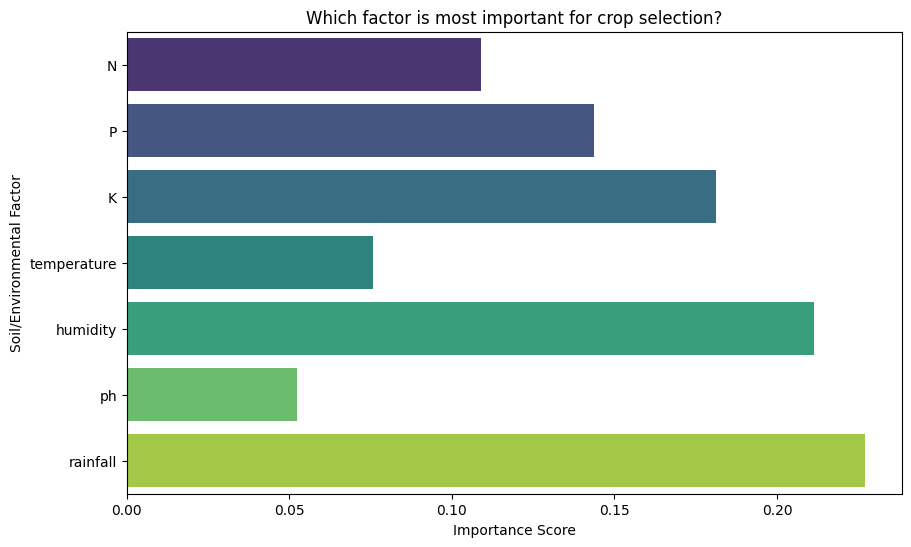

In [9]:
# Get importance levels from the Random Forest model
importances = model.feature_importances_
feature_names = X.columns

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Which factor is most important for crop selection?')
plt.xlabel('Importance Score')
plt.ylabel('Soil/Environmental Factor')
plt.show()

In [10]:
def sustainability_impact(crop_name):
    # Example data: Standard water/fertilizer needs per crop
    # Aligning with SDG 12: Responsible Consumption
    impact_data = {
        'rice': {'water': 'High', 'fertilizer': 'Medium'},
        'maize': {'water': 'Medium', 'fertilizer': 'High'},
        'chickpea': {'water': 'Low', 'fertilizer': 'Low'}
    }

    info = impact_data.get(crop_name, {'water': 'Unknown', 'fertilizer': 'Unknown'})
    print(f"Sustainability Profile for {crop_name}:")
    print(f"- Water Usage: {info['water']} (Target: Optimization)")
    print(f"- Fertilizer Need: {info['fertilizer']} (Target: Waste Reduction)")

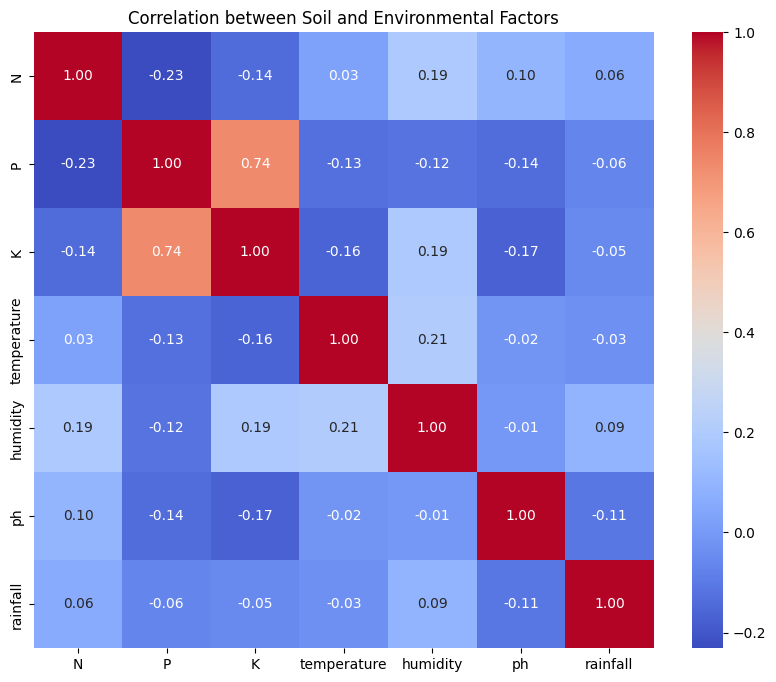

In [11]:
# Add this after your basic print(df.head())
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Soil and Environmental Factors')
plt.show()

In [12]:
def recommend_crop_with_confidence(n, p, k, temp, humidity, ph, rainfall):
    features = pd.DataFrame([[n, p, k, temp, humidity, ph, rainfall]],
                             columns=X_train.columns)

    prediction = model.predict(features)[0]
    # Get the probability of the predicted class
    proba = model.predict_proba(features)
    confidence = np.max(proba) * 100

    print(f"--- AI Recommendation ---")
    print(f"Recommended Crop: {prediction}")
    print(f"AI Confidence Level: {confidence:.2f}%")
    return prediction

In [13]:
def sustainability_advisor(crop_name):
    # Mapping more crops to sustainability metrics
    impact_data = {
        'rice': {'water': 'High', 'soil_health': 'Moderate', 'tip': 'Consider Alternate Wetting and Drying (AWD) to save water.'},
        'jute': {'water': 'High', 'soil_health': 'High', 'tip': 'Excellent for crop rotation to improve soil structure.'},
        'coffee': {'water': 'Moderate', 'soil_health': 'High', 'tip': 'Grown best under shade to preserve local biodiversity.'},
        'lentil': {'water': 'Low', 'soil_health': 'Excellent', 'tip': 'Nitrogen-fixing crop; reduces need for chemical fertilizers.'},
        'cotton': {'water': 'High', 'soil_health': 'Low', 'tip': 'Requires careful pest management to avoid excessive chemical use.'}
    }

    info = impact_data.get(crop_name, {'water': 'Variable', 'soil_health': 'Variable', 'tip': 'Consult local agricultural extension for specific eco-tips.'})

    print(f"\n--- Sustainability Advisor (SDG 12 & 13) ---")
    print(f"Selected Crop: {crop_name}")
    print(f"Water Requirement: {info['water']}")
    print(f"Impact on Soil Health: {info['soil_health']}")
    print(f"Sustainability Tip: {info['tip']}")

/tmp/ipython-input-2000020111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='tab20')


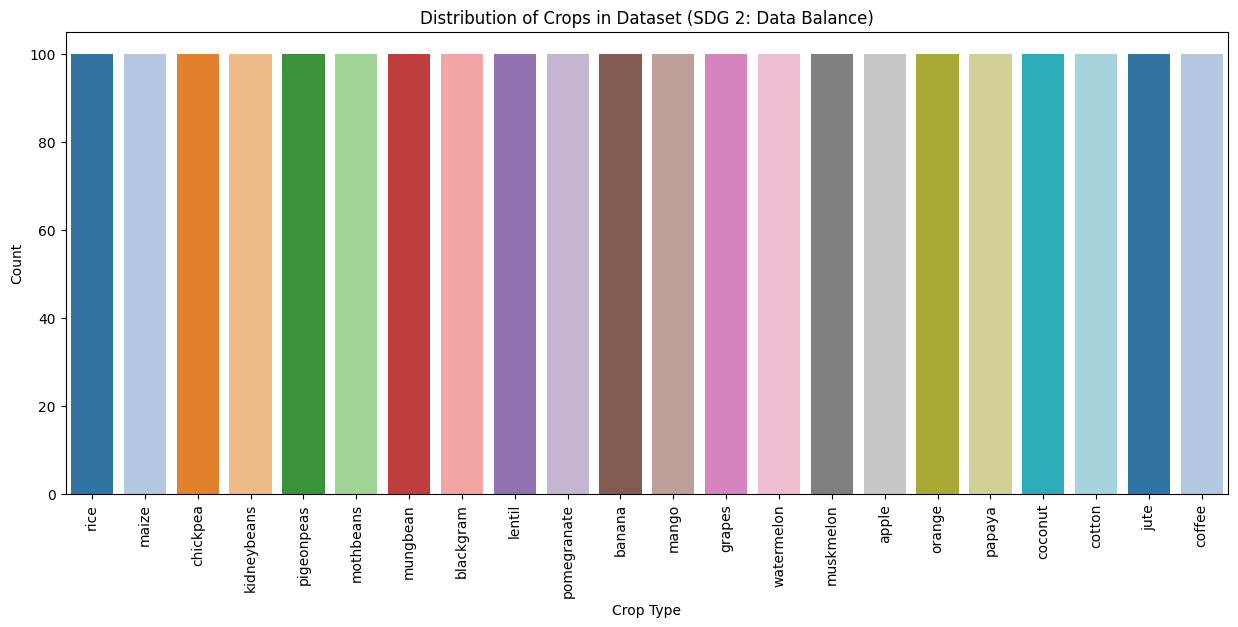

In [14]:
# Plot the distribution of the target labels
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='label', palette='tab20')
plt.xticks(rotation=90)
plt.title('Distribution of Crops in Dataset (SDG 2: Data Balance)')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-3088336763.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='N', data=df_subset, ax=ax[0], palette='Set2')
/tmp/ipython-input-3088336763.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='P', data=df_subset, ax=ax[1], palette='Set2')
/tmp/ipython-input-3088336763.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='K', data=df_subset, ax=ax[2], palette='Set2')


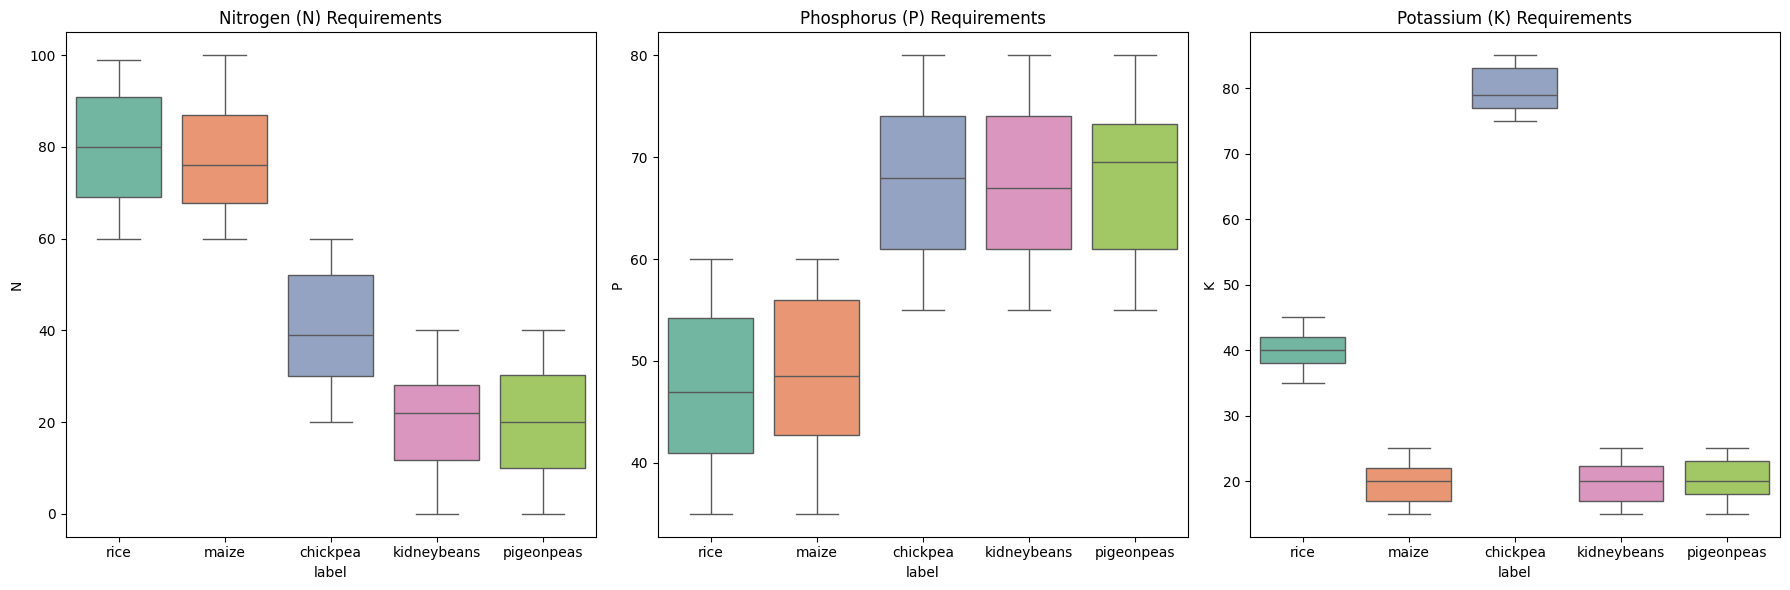

In [15]:
# Nutrient distribution for top 5 crops for better clarity
top_crops = df['label'].unique()[:5]
df_subset = df[df['label'].isin(top_crops)]

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Nitrogen Distribution
sns.boxplot(x='label', y='N', data=df_subset, ax=ax[0], palette='Set2')
ax[0].set_title('Nitrogen (N) Requirements')

# Phosphorus Distribution
sns.boxplot(x='label', y='P', data=df_subset, ax=ax[1], palette='Set2')
ax[1].set_title('Phosphorus (P) Requirements')

# Potassium Distribution
sns.boxplot(x='label', y='K', data=df_subset, ax=ax[2], palette='Set2')
ax[2].set_title('Potassium (K) Requirements')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3752036462.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='rainfall', data=df, palette='coolwarm')


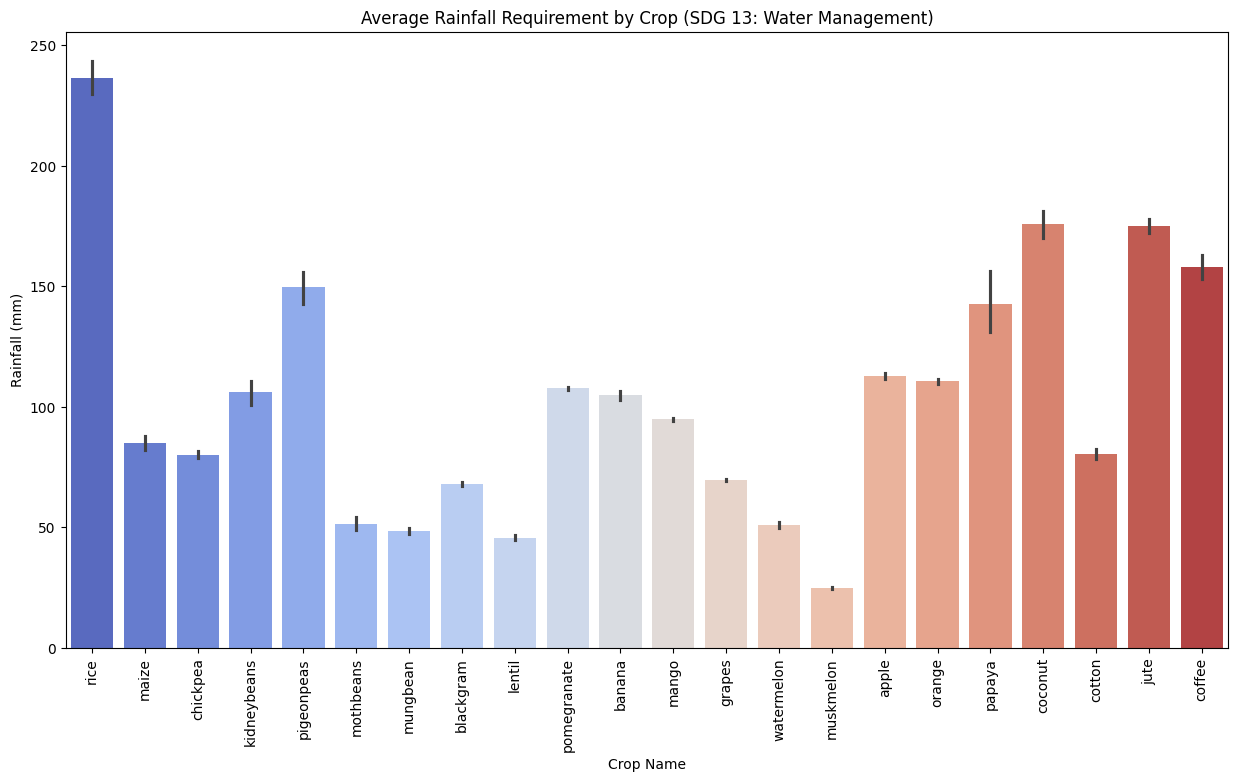

In [16]:
# Analyzing rainfall requirements across different crops
plt.figure(figsize=(15, 8))
sns.barplot(x='label', y='rainfall', data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Average Rainfall Requirement by Crop (SDG 13: Water Management)')
plt.xlabel('Crop Name')
plt.ylabel('Rainfall (mm)')
plt.show()

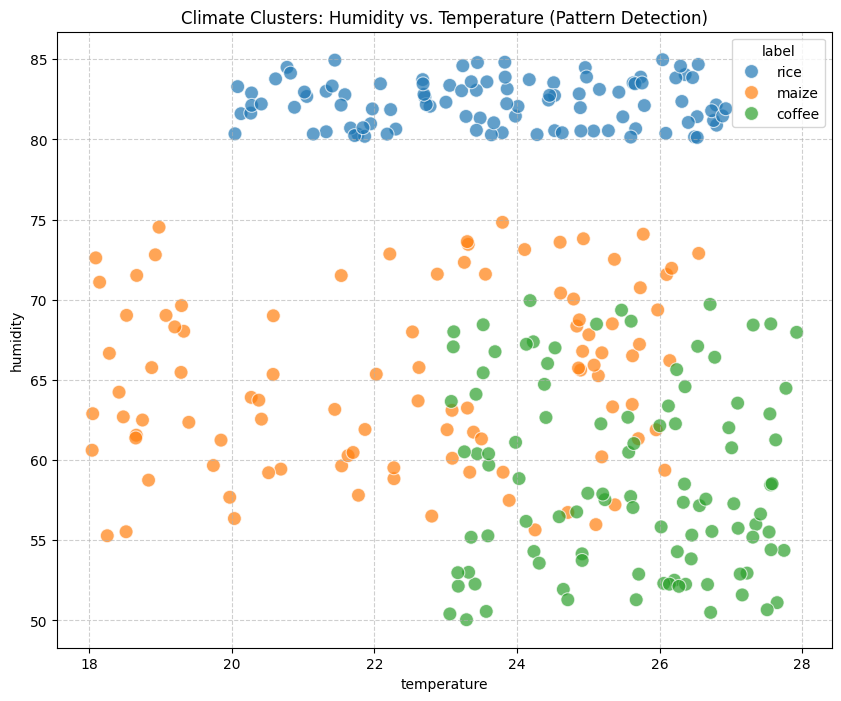

In [17]:
# Scatter plot to show the relationship between Temperature and Humidity for specific crops
# Focusing on rice and maize for comparison
crops_to_compare = df[df['label'].isin(['rice', 'maize', 'coffee'])]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=crops_to_compare, x='temperature', y='humidity', hue='label', s=100, alpha=0.7)
plt.title('Climate Clusters: Humidity vs. Temperature (Pattern Detection)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()